In [1]:
#Starter File 

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from datetime import datetime
from scipy.stats import linregress
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
sp_500_div_yield_month = "S&P_500_div_yield_month.csv"
us_yield_curve = "US_Yield_Curve.csv"
sp_500_1m_futures = "S&P_500_1M_Futures.csv"

sp_500_div_yield_month = pd.read_csv(sp_500_div_yield_month)
us_yield_curve = pd.read_csv(us_yield_curve)
sp_500_1m_futures = pd.read_csv(sp_500_1m_futures)

sp_500_div_yield_month_df = pd.DataFrame(sp_500_div_yield_month)
us_yield_curve_df = pd.DataFrame(us_yield_curve)
sp_500_1m_futures_df = pd.DataFrame(sp_500_1m_futures)

print(sp_500_div_yield_month_df.shape)
print(us_yield_curve_df.shape)
print(sp_500_1m_futures_df.shape)

sp_500_1m_futures_df.head(5)

(1792, 2)
(7560, 13)
(9545, 9)


,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,3/19/2020,NaN,NaN,NaN,NaN,10.7,2403.3,4764,108057
1,3/18/2020,NaN,NaN,NaN,NaN,81.5,2414.0,5300,108108
2,3/17/2020,NaN,NaN,NaN,NaN,79.3,2495.5,10460,109967
3,3/16/2020,NaN,NaN,NaN,NaN,279.7,2416.2,10105,107994
4,3/13/2020,2614.0,2703.0,2490.0,2695.0,227.0,2695.9,13217,107183


In [3]:
sp_500_futures_vs_div_df = pd.merge(sp_500_1m_futures, sp_500_div_yield_month, on="Date", how="outer")
sp_500_futures_vs_div_df = pd.merge(sp_500_futures_vs_div_df, us_yield_curve_df, on="Date", how="outer")

sp_500_futures_vs_div_df = pd.DataFrame({
    "Date": sp_500_futures_vs_div_df["Date"],
    "S&P 500 Close Price": sp_500_futures_vs_div_df["Last"],
    "S&P 500 Dividend Yield": sp_500_futures_vs_div_df["Value"],
    "US Treasury Yield": sp_500_futures_vs_div_df["10 YR"]
})

print(sp_500_futures_vs_div_df.shape)
sp_500_futures_vs_div_df.head(5)

(11043, 4)


,Date,S&P 500 Close Price,S&P 500 Dividend Yield,US Treasury Yield
0,3/19/2020,NaN,NaN,1.12
1,3/18/2020,NaN,NaN,1.18
2,3/17/2020,NaN,NaN,1.02
3,3/16/2020,NaN,NaN,0.73
4,3/13/2020,2695.0,NaN,0.94


In [4]:
sp_500_futures_vs_div_df_sorted = sp_500_futures_vs_div_df.sort_index(axis=0,ascending=False)
sp_500_futures_vs_div_df_sorted.head(5)

,Date,S&P 500 Close Price,S&P 500 Dividend Yield,US Treasury Yield
11042,9/1/1993,NaN,NaN,5.46
11041,4/5/1996,NaN,NaN,6.57
11040,4/2/1999,NaN,NaN,5.20
11039,9/13/2001,NaN,NaN,4.64
11038,9/14/2001,NaN,NaN,4.57


In [5]:
sp_500_futures_vs_div_df_sorted.dtypes

Date                       object
S&P 500 Close Price       float64
S&P 500 Dividend Yield    float64
US Treasury Yield         float64
dtype: object

In [6]:
sp_500_futures_vs_div_df_sorted["Date"] = pd.to_datetime(sp_500_futures_vs_div_df_sorted["Date"])
sp_500_futures_vs_div_df_sorted.dtypes

Date                      datetime64[ns]
S&P 500 Close Price              float64
S&P 500 Dividend Yield           float64
US Treasury Yield                float64
dtype: object

In [7]:
#column_value = sp_500_futures_vs_div_df_sorted[sp_500_futures_vs_div_df_sorted["S&P 500 Close Price"] == 0].index
#sp_500_futures_vs_div_df_sorted.drop(column_value, inplace=True)
#sp_500_futures_vs_div_df_sorted.dropna(subset=[2])

sp_500_futures_vs_div_df_sorted = sp_500_futures_vs_div_df_sorted[sp_500_futures_vs_div_df_sorted["S&P 500 Close Price"].notna()]
column_value = sp_500_futures_vs_div_df_sorted[sp_500_futures_vs_div_df_sorted["Date"] < "1990-01-31"].index
sp_500_futures_vs_div_df_sorted.drop(column_value, inplace=True)
sp_500_futures_vs_div_df_sorted.head(50)

,Date,S&P 500 Close Price,S&P 500 Dividend Yield,US Treasury Yield
7576,1990-01-31,330.50,3.28,8.43
7575,1990-02-01,330.10,NaN,8.42
7574,1990-02-02,332.50,NaN,8.50
7573,1990-02-05,333.40,NaN,8.53
7572,1990-02-06,330.25,NaN,8.57
7571,1990-02-07,335.80,NaN,8.52
7570,1990-02-08,335.30,NaN,8.49
7569,1990-02-09,334.40,NaN,8.31
7568,1990-02-12,330.75,NaN,8.40
7567,1990-02-13,332.65,NaN,8.35


In [8]:
#sp_500_futures_vs_div_df_sorted.head(50)
#sp_500_futures_vs_div_df_sorted.to_csv("spandspdiv.csv")

In [9]:
total_yield_list = []
close_price_list = []
dollar_yield_list = []

for index, row in sp_500_futures_vs_div_df_sorted.iterrows():
    price_row = row["S&P 500 Close Price"]
    yield_row = row["S&P 500 Dividend Yield"]
    #print(price_row, yield_row)
    if yield_row > 0:
        total_yield_list.append(yield_row)
        current_yield = yield_row
        dollar_yield = (current_yield / 100) * price_row
        dollar_yield_list.append(dollar_yield)
    else:
        percent_yield = dollar_yield / price_row *100
        total_yield_list.append(percent_yield)
        
#print(total_yield_list)
#print(dollar_yield_list)

print(len(total_yield_list))
        

7563


In [14]:
sp_500_futures_vs_div_df_sorted["Percent Dividend Yield"] = total_yield_list
    #"Percent Dividend Yield": total_yield_list,
    #"Dollar Dividend Yield": dollar_yield_list
#})
sp_500_futures_vs_div_df_sorted.head(50)

,Date,S&P 500 Close Price,S&P 500 Dividend Yield,US Treasury Yield,Percent Dividend Yield
7576,1990-01-31,330.50,3.28,8.43,3.280000
7575,1990-02-01,330.10,NaN,8.42,3.283975
7574,1990-02-02,332.50,NaN,8.50,3.260271
7573,1990-02-05,333.40,NaN,8.53,3.251470
7572,1990-02-06,330.25,NaN,8.57,3.282483
7571,1990-02-07,335.80,NaN,8.52,3.228231
7570,1990-02-08,335.30,NaN,8.49,3.233045
7569,1990-02-09,334.40,NaN,8.31,3.241746
7568,1990-02-12,330.75,NaN,8.40,3.277521
7567,1990-02-13,332.65,NaN,8.35,3.258801


In [11]:
#sp_500_futures_vs_div_df_sorted = pd.merge(sp_500_futures_vs_div_df_sorted, us_yield_curve_df, on="Date", how="inner")
#sp_500_futures_vs_div_df_sorted.head()

In [12]:
sp_500_futures_vs_div_2000_df = sp_500_futures_vs_div_df_sorted.loc[(sp_500_futures_vs_div_df_sorted["Date"] >= "2006-04-30") 
                                               & (sp_500_futures_vs_div_df_sorted["Date"] <= "2010-02-28")]
#yields_monthly_2008_df = yields_monthly_df.loc[yields_monthly_df["Date"] <= "2000-07-31", :]
sp_500_futures_vs_div_2000_df.head(5)

,Date,S&P 500 Close Price,S&P 500 Dividend Yield,US Treasury Yield,Percent Dividend Yield
3482,2006-05-01,1308.2,NaN,5.14,1.753408
3481,2006-05-02,1318.1,NaN,5.12,1.740238
3480,2006-05-03,1312.3,NaN,5.15,1.747930
3479,2006-05-04,1317.0,NaN,5.16,1.741692
3478,2006-05-05,1328.9,NaN,5.12,1.726095


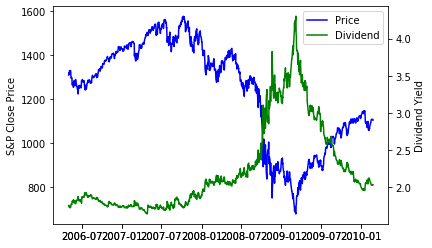

In [13]:
fig1 = plt.figure()

ax1 = fig1.add_subplot(111)
line1 = ax1.plot(sp_500_futures_vs_div_2000_df["Date"], sp_500_futures_vs_div_2000_df["S&P 500 Close Price"], "b-")
plt.ylabel("S&P Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(sp_500_futures_vs_div_2000_df["Date"], sp_500_futures_vs_div_2000_df["Percent Dividend Yield"], "g-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.ylabel("Dividend Yield")
ax1.legend((line1+line2), ("Price", "Dividend"), loc=0)
#plt.legend((line1, line2), ("Price", "Yield"), loc="upper left")
plt.show()

